Import Library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

Dataset

https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByMajorCity.csv

Fungsi untuk mengetahui kota apa saja yang terdapat pada dataset dan berapa jumlah data tiap kota

In [2]:
def counter_item(items):
    unique = []
    number = []
    
    for i in items:
        if i not in unique:
            unique.append(i)
            number.append(items.count(i))
        
    zippedlist = zip(unique, number)
    result = dict(zip(unique, number))
    
    return result

Load dataset dan memeriksa kota serta jumlah datanya pada dataset

In [3]:
df1 = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df1.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
51788,1753-05-01,12.510,2.102,Chicago,United States,42.59N,87.27W
79200,2013-09-01,NaN,NaN,Guangzhou,China,23.31N,112.72E
1416,1967-01-01,26.344,0.159,Abidjan,Côte D'Ivoire,5.63N,3.23W
12298,1788-10-01,12.043,2.533,Ankara,Turkey,39.38N,33.29E
120335,1872-05-01,NaN,NaN,Lagos,Nigeria,5.63N,3.23E


In [4]:
city = df1['City']
city = list(city)

city_dict = counter_item(city)
print(city_dict)

{'Abidjan': 1977, 'Addis Abeba': 1965, 'Ahmadabad': 2613, 'Aleppo': 2669, 'Alexandria': 2669, 'Ankara': 3105, 'Baghdad': 2337, 'Bangalore': 2613, 'Bangkok': 2371, 'Belo Horizonte': 2181, 'Berlin': 3239, 'Bogotá': 2277, 'Bombay': 2613, 'Brasília': 2181, 'Cairo': 2460, 'Calcutta': 2613, 'Cali': 2265, 'Cape Town': 1881, 'Casablanca': 3009, 'Changchun': 2318, 'Chengdu': 2318, 'Chicago': 3239, 'Chongqing': 2085, 'Dakar': 1977, 'Dalian': 2213, 'Dar Es Salaam': 1965, 'Delhi': 2613, 'Dhaka': 2613, 'Durban': 1881, 'Faisalabad': 2371, 'Fortaleza': 2025, 'Gizeh': 2460, 'Guangzhou': 2085, 'Harare': 1965, 'Harbin': 2318, 'Ho Chi Minh City': 2265, 'Hyderabad': 2613, 'Ibadan': 1893, 'Istanbul': 3239, 'Izmir': 3129, 'Jaipur': 2613, 'Jakarta': 2265, 'Jiddah': 2049, 'Jinan': 2085, 'Kabul': 2169, 'Kano': 1893, 'Kanpur': 2613, 'Karachi': 2613, 'Kiev': 3239, 'Kinshasa': 1893, 'Lagos': 1977, 'Lahore': 2371, 'Lakhnau': 2613, 'Lima': 1591, 'London': 3239, 'Los Angeles': 1977, 'Luanda': 1893, 'Madras': 2613, '

Memilih data kota pada dataset dan memeriksa apakah ada data yang null atau nan pada data kota tersebut

In [5]:
london = df1[df1['City'] == 'London']
print(london.isna().sum())

dt                                0
AverageTemperature               73
AverageTemperatureUncertainty    73
City                              0
Country                           0
Latitude                          0
Longitude                         0
dtype: int64


Melakukan interpolasi untuk mengisi data yang kosong pada dataset

In [6]:
london['AverageTemperature'] = london['AverageTemperature'].interpolate()
london['AverageTemperatureUncertainty'] = london['AverageTemperatureUncertainty'].interpolate()
london

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
128607,1743-11-01,7.541,1.7530,London,United Kingdom,52.24N,0.00W
128608,1743-12-01,7.692,1.9026,London,United Kingdom,52.24N,0.00W
128609,1744-01-01,7.843,2.0522,London,United Kingdom,52.24N,0.00W
128610,1744-02-01,7.994,2.2018,London,United Kingdom,52.24N,0.00W
128611,1744-03-01,8.145,2.3514,London,United Kingdom,52.24N,0.00W
...,...,...,...,...,...,...,...
131841,2013-05-01,10.809,0.4790,London,United Kingdom,52.24N,0.00W
131842,2013-06-01,14.698,0.4220,London,United Kingdom,52.24N,0.00W
131843,2013-07-01,18.694,0.3860,London,United Kingdom,52.24N,0.00W
131844,2013-08-01,17.791,0.3290,London,United Kingdom,52.24N,0.00W


Memeriksa kembali apakah masih ada data yang kosong pada dataset

In [7]:
print(london.isna().sum())

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64


Menentukan kolom/fitur data yang akan digunakan

In [8]:
data = london[['dt', 'AverageTemperature']]
data = data.reset_index(drop=True)
data

,dt,AverageTemperature
0,1743-11-01,7.541
1,1743-12-01,7.692
2,1744-01-01,7.843
3,1744-02-01,7.994
4,1744-03-01,8.145
...,...,...
3234,2013-05-01,10.809
3235,2013-06-01,14.698
3236,2013-07-01,18.694
3237,2013-08-01,17.791


Plotting data temperatur rata-rata kota London per bulan

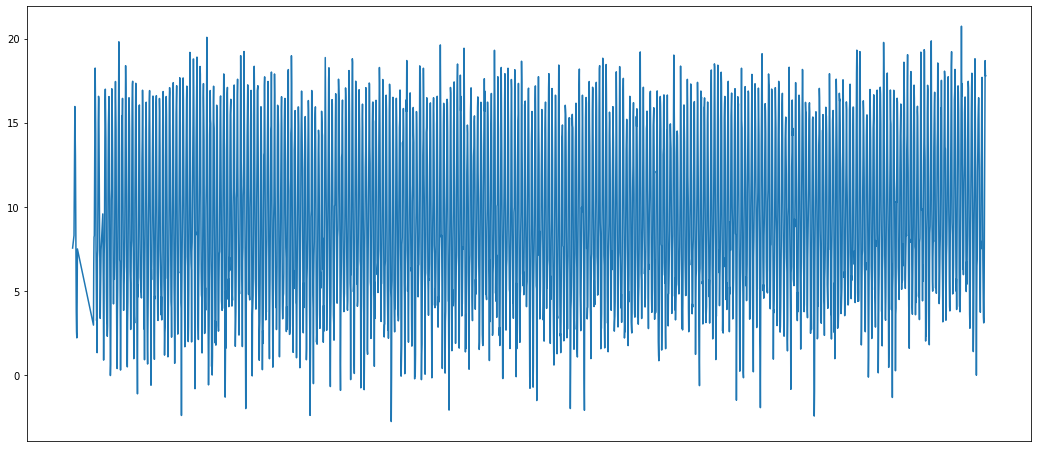

In [9]:
date = data['dt']
avgtemp = data['AverageTemperature']

plt.figure(figsize=(18,8))
plt.plot(date, avgtemp)
plt.xticks([])
plt.show()

Melakukan normalisai pada kolom temperatur rata-rata

In [ ]:
# # code here
# def normalize(kolom):
#     return (kolom - kolom.min()) / (kolom.max() - kolom.min())
# data['AverageTemperature'] = data[['AverageTemperature']].apply(normalize)
# data.head()

,dt,AverageTemperature
0,1743-11-01,0.438786
1,1743-12-01,0.445205
2,1744-01-01,0.451624
3,1744-02-01,0.458043
4,1744-03-01,0.464462


Nilai maximum MAE

In [10]:
maximum_mae = (data['AverageTemperature'].max() - data['AverageTemperature'].min()) * 0.1
print(maximum_mae)

2.3524000000000003


Menentukan data training (80% baris awal data) dan validasi (20% baris terakhir data)

In [11]:
split = 0.8

train_end = int((data.shape[0] - 1) * 0.8)
train_end

train = data.iloc[:train_end]
val = data.iloc[train_end:]

display(train, val)

,dt,AverageTemperature
0,1743-11-01,7.541
1,1743-12-01,7.692
2,1744-01-01,7.843
3,1744-02-01,7.994
4,1744-03-01,8.145
...,...,...
2585,1959-04-01,9.584
2586,1959-05-01,12.354
2587,1959-06-01,15.658
2588,1959-07-01,18.168


,dt,AverageTemperature
2590,1959-09-01,15.779
2591,1959-10-01,12.570
2592,1959-11-01,6.712
2593,1959-12-01,5.682
2594,1960-01-01,3.756
...,...,...
3234,2013-05-01,10.809
3235,2013-06-01,14.698
3236,2013-07-01,18.694
3237,2013-08-01,17.791


Memilih kolom data training dan validasi yang akan dipelajari oleh model

In [12]:
temp_train = train['AverageTemperature'].values
temp_val = val['AverageTemperature'].values

Membuat fungsi window dan menerapkannya untuk data training serta validasi

In [13]:
def window_dataset(series, size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(size + 1, shift = 1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[1:]))
  
  return ds.batch(batch_size).prefetch(1)

In [14]:
train_set = window_dataset(temp_train, 25, 50, 1000)
val_set = window_dataset(temp_val, 25, 50, 1000)

Membuat model, menentukan optimizer, learning rate, callback, loss serta metrics yang digunakan

In [15]:
model = Sequential()

model.add(LSTM(25, return_sequences=True))
model.add(LSTM(25, return_sequences=True))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

callback = EarlyStopping(monitor='val_mae', patience = 2)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=['mae'])

Melatih model dengan data training dan validasi

In [16]:
hist = model.fit(train_set, epochs=10,
                 validation_data=val_set,
                 batch_size=50,
                 callbacks = [callback])

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

52/52 [==============================] - 1s 25ms/step - loss: 6.2188 - mae: 6.7062 - val_loss: 4.1135 - val_mae: 4.5964
Epoch 2/10
52/52 [==============================] - 1s 11ms/step - loss: 3.8564 - mae: 4.3382 - val_loss: 3.0275 - val_mae: 3.5006
Epoch 3/10
52/52 [==============================] - 1s 12ms/step - loss: 1.9071 - mae: 2.3595 - val_loss: 1.1135 - val_mae: 1.5445
Epoch 4/10
52/52 [==============================] - 1s 12ms/step - loss: 1.2610 - mae: 1.6949 - val_loss: 1.1007 - 

Plotting loss dan mae pada data training dan validasi

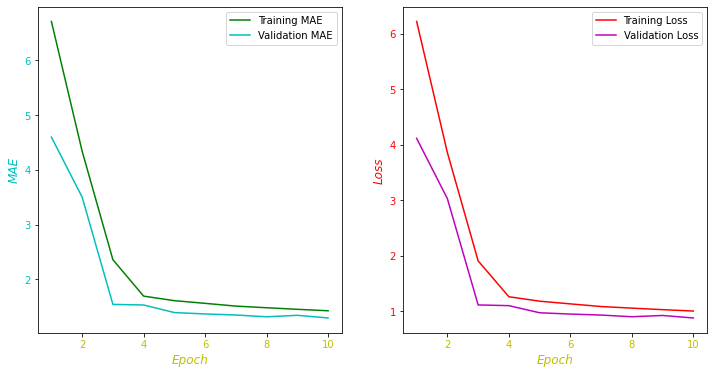

In [17]:
n = len(hist.history['loss']) + 1
ep = np.arange(1, n, 1)

fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].set_xlabel('Epoch', style='italic', size=12, color='y')
ax[0].set_ylabel('MAE', style='italic', size = 12, color = 'c')
ax[0].plot(ep, hist.history['mae'], color = 'g')
ax[0].plot(ep, hist.history['val_mae'], color = 'c')
ax[0].tick_params(axis='x', labelcolor='y')
ax[0].tick_params(axis='y', labelcolor='c')
ax[0].legend(['Training MAE', 'Validation MAE'], loc='upper right')

ax[1].set_xlabel('Epoch', style='italic', size=12, color='y')
ax[1].set_ylabel('Loss', style = 'italic', size = 12, color = 'r')
ax[1].plot(ep, hist.history['loss'], color = 'r')
ax[1].plot(ep, hist.history['val_loss'], color = 'm')
ax[1].tick_params(axis='x', labelcolor='y')
ax[1].tick_params(axis='y', labelcolor='r')
ax[1].legend(['Training Loss', 'Validation Loss'], loc='upper right')

Referensi:

https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/notebooks

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

https://keras.io/api/callbacks/early_stopping/

https://keras.io/api/callbacks/

https://keras.io/api/optimizers/

https://keras.io/api/optimizers/adam/

https://keras.io/api/metrics/regression_metrics/#meanabsoluteerror-class

https://github.com/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%204%20Exercise%20Answer.ipynb

https://machinelearningmastery.com/tune-lstm-hyperparameters-keras-time-series-forecasting/

In [ ]:
d = {1 : ('A', 1),
     2 : ('B', 2),
     3 : ('C', 4),
     4 : ('e', 5),
     5 : ('d', 9)}

idx = [2,5,4,6,9]

for i in idx:
  if i in d.keys():
    print(d[i])
  else:
    continue
    # print('key {} not found in dictionary'.format(i))

('B', 2)
('d', 9)
('e', 5)
